In [22]:
# Standard imports
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import geopandas as gpd

In [23]:
# data can be found under ...Github\BarrierRemoval\Data\Test Data\Python\FullBarrierLayer.shp
barriers = gpd.read_file(r"C:\Users\b8008458\OneDrive - Newcastle University\2021 to 2022\Dissertation\Github\BarrierRemoval\Study Areas\York\Barriers\YorkBarriersScored.gpkg")

In [24]:
barriers.head(2)

,globalid,AuditAmend,CriticalDi,OnNCN,Restrictio,Critical_1,Other,Status,CreationDa,Creator,...,origin_id,total_cost,CarsPerCit,IMDScore,objectid,amenity_diff,amenity_diff_bike,total_pass,Betweennes,geometry
0,54ade712-9b6c-4716-96c0-9efb9f62d005,Auditing,0,yes,BollardMultiple,105,None,Too Narrow,2022-06-20,RH_Access_Sustrans_UK,...,54ade712-9b6c-4716-96c0-9efb9f62d005,150.568612,0.473555,6.104,46543,82,573,4403.0,0.000070,POINT (460281.698 450314.716)
1,f6daa07a-d3e7-4f04-abd9-4cae134e562f,Auditing,0,yes,BollardMultiple,224,None,Acceptable Width,2022-06-20,RH_Access_Sustrans_UK,...,f6daa07a-d3e7-4f04-abd9-4cae134e562f,104.259386,0.380858,6.808,39803,81,557,10596.0,0.000797,POINT (460387.948 450211.747)


In [26]:
# normliase all mertic
barrier_copy = barriers[['Betweennes','total_pass', 'min_gain','Critical_1','CarsPerCit','IMDScore', 'amenity_diff','amenity_diff_bike']] # IMDScore and CarsPerCit for England
# inverse weighting for barriers as wider barriers are better barriers :)
barrier_copy['Critical_1'] *= -1
barrier_copy['IMDScore'] *= -1 # IMDScore and CarsPerCit for England, rank for Wales
barrier_copy['CarsPerCit'] *= -1 # IMDScore and CarsPerCit for England, CarPerCit for Wales

for column in barrier_copy:
    barrier_copy[column] = (barrier_copy[column] - barrier_copy[column].min()) / (barrier_copy[column].max() - barrier_copy[column].min())
    

C:\Users\b8008458\AppData\Local\Temp\ipykernel_27796\1641242161.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  barrier_copy['Critical_1'] *= -1
C:\Users\b8008458\AppData\Local\Temp\ipykernel_27796\1641242161.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  barrier_copy['IMDScore'] *= -1 # IMDScore and CarsPerCit for England, rank for Wales
C:\Users\b8008458\AppData\Local\Temp\ipykernel_27796\1641242161.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.


<AxesSubplot:xlabel='Barrier ID', ylabel='Overall Score'>

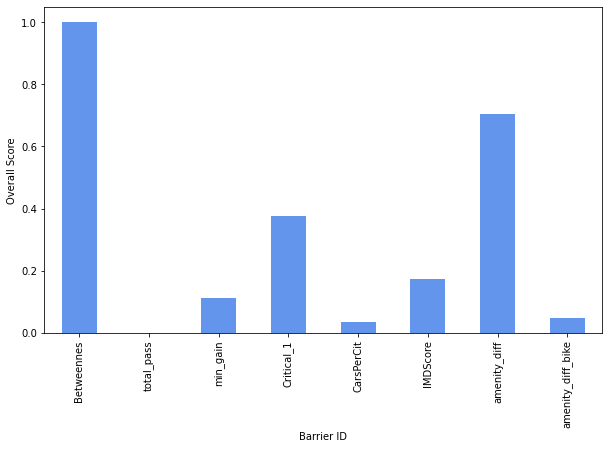

In [27]:
row = barrier_copy.iloc[32]
row.plot(kind = 'bar', figsize=(10,6), color='cornflowerblue', xlabel='Barrier ID', ylabel='Overall Score')

In [29]:
# apply weights derived from AHP
barrier_copy['Betweennes'] = barrier_copy['Betweennes'] * 0.057
barrier_copy['total_pass'] = barrier_copy['total_pass'] * 0.011
barrier_copy['min_gain'] = barrier_copy['min_gain'] * 0.016
barrier_copy['Critical_1'] = barrier_copy['Critical_1'] * 0.451
barrier_copy['CarsPerCit'] = barrier_copy['CarsPerCit'] * 0.013 # carspercit for Wales
barrier_copy['IMDScore'] = barrier_copy['IMDScore'] * 0.056 # rank for Wales
barrier_copy['amenity_diff'] = barrier_copy['amenity_diff'] * 0.165
barrier_copy['amenity_diff_bike'] = barrier_copy['amenity_diff_bike'] * 0.165

C:\Users\b8008458\AppData\Local\Temp\ipykernel_27796\3160976048.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  barrier_copy['Betweennes'] = barrier_copy['Betweennes'] * 0.057
C:\Users\b8008458\AppData\Local\Temp\ipykernel_27796\3160976048.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  barrier_copy['total_pass'] = barrier_copy['total_pass'] * 0.011
C:\Users\b8008458\AppData\Local\Temp\ipykernel_27796\3160976048.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

<AxesSubplot:xlabel='Barrier ID', ylabel='Overall Score'>

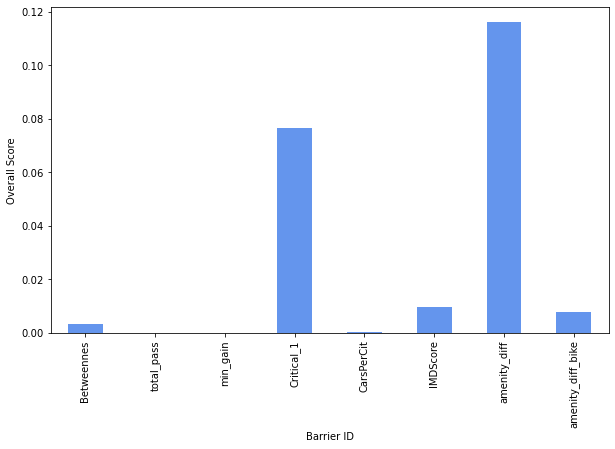

In [30]:
row = barrier_copy.iloc[32]
row.plot(kind = 'bar', figsize=(10,6), color='cornflowerblue', xlabel='Barrier ID', ylabel='Overall Score')

C:\Users\b8008458\AppData\Local\Temp\ipykernel_27796\43616866.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  barrier_copy['Overall_Score'] = barrier_copy[cols].sum(axis=1)


<AxesSubplot:xlabel='Barrier ID', ylabel='Overall Score'>

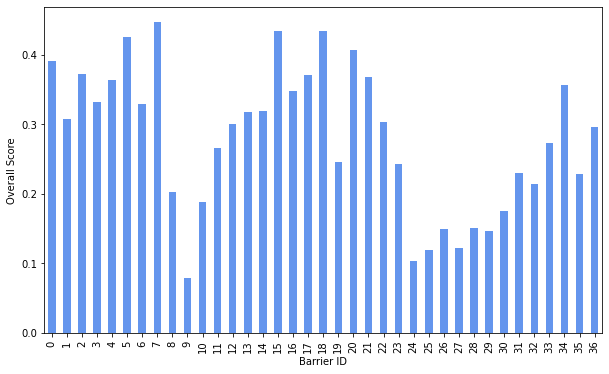

In [32]:
# final scoring
cols = ['Betweennes','total_pass', 'min_gain','Critical_1','CarsPerCit','IMDScore', 'amenity_diff','amenity_diff_bike'] # IMDScore and CarsPerCit for England
barrier_copy['Overall_Score'] = barrier_copy[cols].sum(axis=1)
barrier_copy['Overall_Score'].plot(kind = 'bar', figsize=(10,6), color='cornflowerblue', xlabel='Barrier ID', ylabel='Overall Score')

In [33]:
# join final scores back to original barrier dataset

# set indexs to join on
barrier_copy['Index'] = barrier_copy.index
barriers['Index'] = barriers.index

# join 
barrier_copy = gpd.GeoDataFrame(barrier_copy)
join = barriers.merge(barrier_copy, on = 'Index', how='left', suffixes=('_x', ''))
join.drop(join.filter(regex='_x$').columns, axis=1, inplace=True)

C:\Users\b8008458\AppData\Local\Temp\ipykernel_27796\2127132075.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  barrier_copy['Index'] = barrier_copy.index


<AxesSubplot:xlabel='Barrier ID', ylabel='Overall Score'>

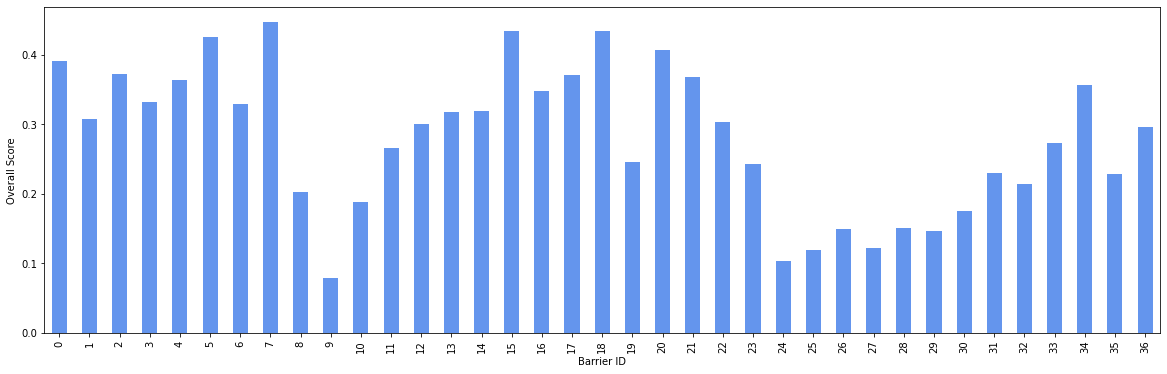

In [34]:
import matplotlib as plt
barrier_copy['Overall_Score'].plot(kind = 'bar', figsize=(20,6), color='cornflowerblue', xlabel='Barrier ID', ylabel='Overall Score')

In [35]:
join.to_file(r"C:\Users\b8008458\OneDrive - Newcastle University\2021 to 2022\Dissertation\Github\BarrierRemoval\Study Areas\York\Barriers\YorkBarriersMetricsWeighted.gpkg")